# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
#Create Data
data = make_blobs(
    n_samples=200, 
    n_features=2, 
    centers=4, 
    cluster_std=1.8,
    random_state=101
)

In [4]:
print(data[0])

[[-6.42884095e+00  1.01411174e+01]
 [ 5.86867888e+00  5.20110356e+00]
 [-3.76109375e-01  3.26427943e+00]
 [ 2.16679181e+00  9.56300522e+00]
 [ 5.09508570e+00  7.20752718e+00]
 [-1.08788882e+01 -6.11318040e+00]
 [ 2.03405554e+00  9.76664755e+00]
 [-1.71798771e+00  1.41401140e+00]
 [ 1.16911341e+00  8.24556988e+00]
 [-1.35185444e+00  3.13245345e+00]
 [-6.18548214e+00  9.67406555e+00]
 [-1.19856602e+00  2.50408937e+00]
 [ 2.90296863e+00  7.91251003e+00]
 [ 2.39250023e+00  5.38173971e+00]
 [-5.27545147e+00  9.63836659e+00]
 [-5.66814687e-01  5.60262755e-02]
 [ 5.97336628e+00  5.87172022e+00]
 [-2.31355268e+00  5.23980092e-01]
 [-1.01344756e+01 -3.43130837e+00]
 [-4.54082629e+00  1.13920174e+01]
 [-1.04155833e+01 -5.67545836e+00]
 [ 6.64796693e-01  9.42304718e-02]
 [ 2.11460477e+00  3.55938488e+00]
 [-1.11790221e+01 -9.30976605e+00]
 [-6.63698251e+00  6.39426436e+00]
 [-7.67422005e+00 -7.26839654e+00]
 [-7.98668260e+00 -9.57113308e+00]
 [ 1.27983684e+00  3.53150777e-01]
 [ 3.54480244e+00  7

In [5]:
print(data[0][:, 0])

[-6.42884095e+00  5.86867888e+00 -3.76109375e-01  2.16679181e+00
  5.09508570e+00 -1.08788882e+01  2.03405554e+00 -1.71798771e+00
  1.16911341e+00 -1.35185444e+00 -6.18548214e+00 -1.19856602e+00
  2.90296863e+00  2.39250023e+00 -5.27545147e+00 -5.66814687e-01
  5.97336628e+00 -2.31355268e+00 -1.01344756e+01 -4.54082629e+00
 -1.04155833e+01  6.64796693e-01  2.11460477e+00 -1.11790221e+01
 -6.63698251e+00 -7.67422005e+00 -7.98668260e+00  1.27983684e+00
  3.54480244e+00  4.03940181e+00 -2.88118898e+00 -9.11009911e+00
  5.26001172e+00  2.05859724e+00 -1.71289834e+00 -5.40562319e+00
 -1.11995123e+01 -1.13753641e+01 -1.17821836e+01  1.74815503e+00
 -9.00392334e+00 -2.86564584e+00 -1.42742293e+00 -3.10933432e+00
  2.71130095e-01  8.21556561e-01 -4.11495481e+00  1.55414928e+00
 -1.16546211e+01 -1.22009637e+00  3.22017630e+00 -5.40452892e+00
  6.02795351e+00  4.02600451e-01 -7.38985009e+00 -1.60537707e+00
  8.72770362e-01  1.03445241e+00 -3.88943018e+00  3.16835529e+00
 -8.07309689e+00  9.16131

In [6]:
print(data[0][:, 0])

[-6.42884095e+00  5.86867888e+00 -3.76109375e-01  2.16679181e+00
  5.09508570e+00 -1.08788882e+01  2.03405554e+00 -1.71798771e+00
  1.16911341e+00 -1.35185444e+00 -6.18548214e+00 -1.19856602e+00
  2.90296863e+00  2.39250023e+00 -5.27545147e+00 -5.66814687e-01
  5.97336628e+00 -2.31355268e+00 -1.01344756e+01 -4.54082629e+00
 -1.04155833e+01  6.64796693e-01  2.11460477e+00 -1.11790221e+01
 -6.63698251e+00 -7.67422005e+00 -7.98668260e+00  1.27983684e+00
  3.54480244e+00  4.03940181e+00 -2.88118898e+00 -9.11009911e+00
  5.26001172e+00  2.05859724e+00 -1.71289834e+00 -5.40562319e+00
 -1.11995123e+01 -1.13753641e+01 -1.17821836e+01  1.74815503e+00
 -9.00392334e+00 -2.86564584e+00 -1.42742293e+00 -3.10933432e+00
  2.71130095e-01  8.21556561e-01 -4.11495481e+00  1.55414928e+00
 -1.16546211e+01 -1.22009637e+00  3.22017630e+00 -5.40452892e+00
  6.02795351e+00  4.02600451e-01 -7.38985009e+00 -1.60537707e+00
  8.72770362e-01  1.03445241e+00 -3.88943018e+00  3.16835529e+00
 -8.07309689e+00  9.16131

In [7]:
data[0].shape

(200, 2)

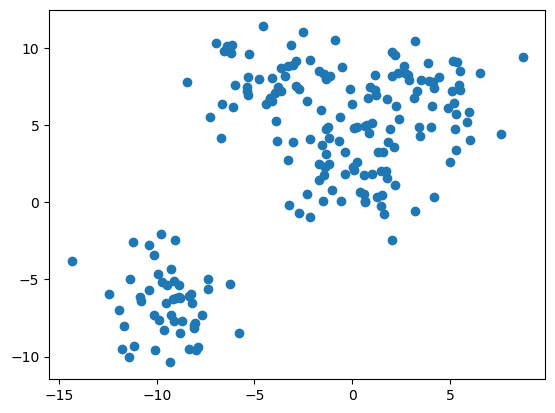

In [8]:
plt.scatter(data[0][:, 0], data[0][:, 1])

In [9]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [10]:
pd.Series(data[1]).value_counts()

3    50
2    50
0    50
1    50
dtype: int64

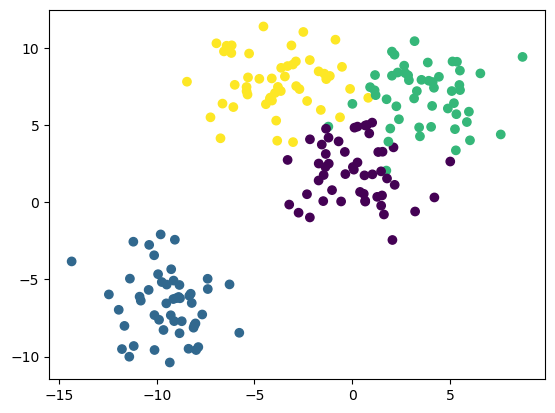

In [11]:
plt.scatter(
    data[0][:,0],
    data[0][:, 1],
    c=data[1]
)

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=4, n_init='auto')

In [14]:
kmeans.fit(data[0])

KMeans(n_clusters=4, n_init='auto')

In [15]:
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851]])

In [16]:
kmeans.cluster_centers_[:, 0]

array([-0.0123077 , -9.46941837,  3.71749226, -4.13591321])

In [17]:
centers = kmeans.cluster_centers_

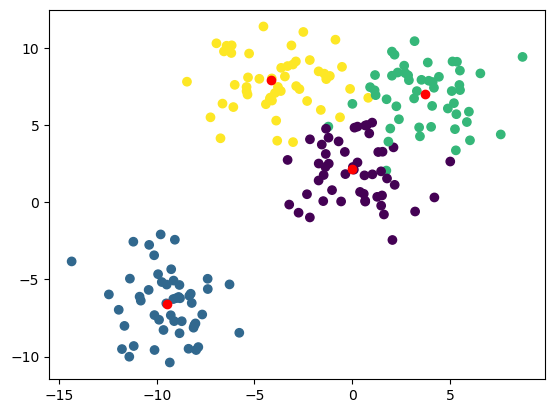

In [18]:
plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1])
plt.scatter(centers[:,0], centers[:,1], color='red')

In [19]:
kmeans.labels_

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 0, 1, 3, 3, 3,
       0, 2, 3, 0, 1, 0, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 2, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0], dtype=int32)

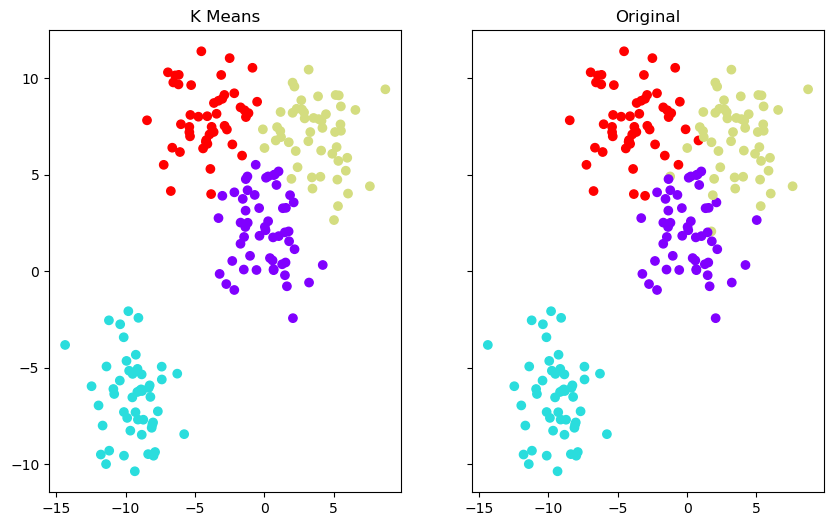

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
print(confusion_matrix(data[1], kmeans.labels_))

[[49  0  1  0]
 [ 0 50  0  0]
 [ 3  0 47  0]
 [ 2  0  2 46]]


In [23]:
print(classification_report(data[1], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        50
           1       1.00      1.00      1.00        50
           2       0.94      0.94      0.94        50
           3       1.00      0.92      0.96        50

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [24]:
kmeans = KMeans(n_clusters=2)

In [25]:
kmeans.fit(data[0])

/home/kauas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

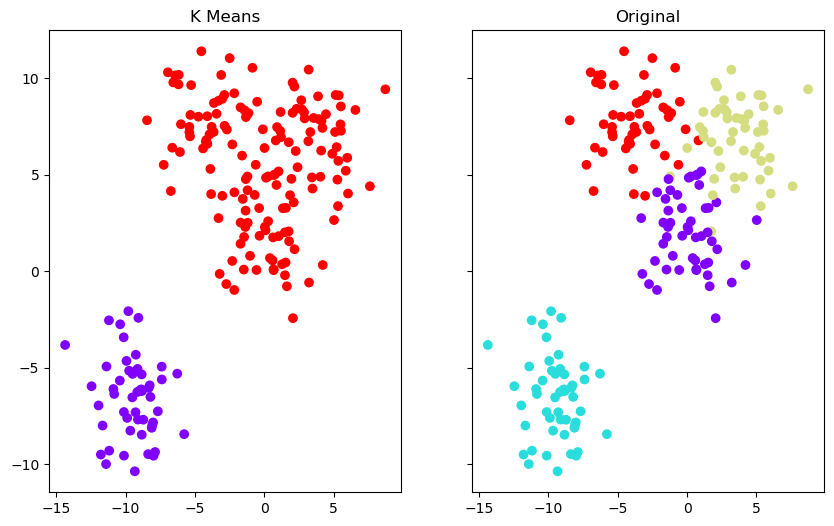

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [27]:
kmeans = KMeans(n_clusters=3)

In [28]:
kmeans.fit(data[0])

/home/kauas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

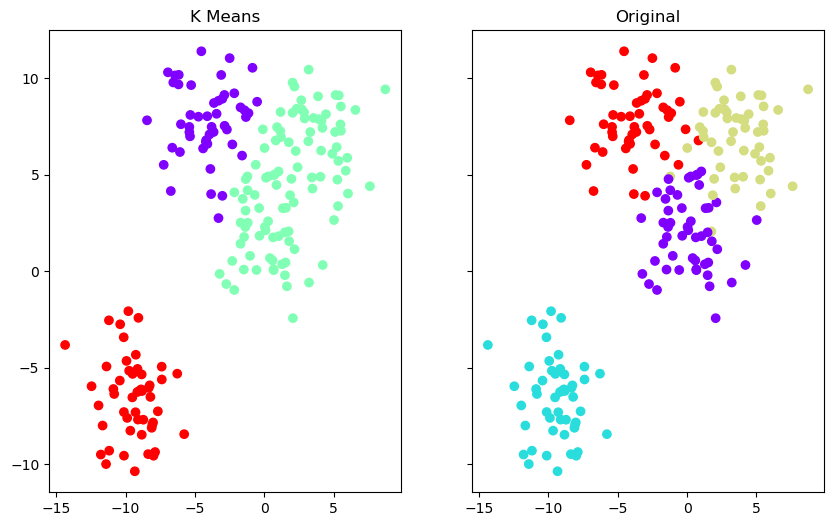

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')